In [35]:
import typing as t
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [3]:
def generate_dataset(
    size: int = 20,
    dim: int = 2,
    min: int = -10,
    max: int = 10,
    seed: int = 0,
) -> np.ndarray:
    return (max - min) * np.random.default_rng(seed).random((size, dim)) + min

In [27]:
class KMeans:
    def __init__(self, n_clusters: int = 8, max_iter: int = 300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        self.centroids_history = []
        self.labels_history = []
        self.centroids = None
        self.labels = None

    def fit(self, X: np.ndarray):
        data = X
        self.centroids = self._initialize_clusters(
            data=data, 
            n_clusters=self.n_clusters,
        )
        self.labels_history = []
        self.centroids_history = [self.centroids]

        for _ in range(self.max_iter):
            self.labels = self._assign_points(data=data, centroids=self.centroids)
            self.labels_history.append(self.labels)
            self.centroids = KMeans._update_centroids(
                data=data, 
                assignations=self.labels, 
                n_clusters=self.n_clusters,
            )
            self.centroids_history.append(self.centroids)
        return self

    @staticmethod
    def _initialize_clusters(
        data: np.ndarray, n_clusters: int, seed: int = 0
    ) -> np.ndarray:
        if len(data.shape) != 2:
            raise ValueError(f"Expected data of shape 2, shape={data.shape}")

        min = data.min()
        max = data.max()
        dim = data.shape[1]
        return (max - min) * np.random.default_rng(seed).random((n_clusters, dim)) + min

    @staticmethod
    def _assign_points(data: np.ndarray, centroids: np.ndarray) -> np.ndarray:
        # e.g. [ [0.71, 12.6] , [12.3, 0.40] ... ]
        distances = cdist(data, centroids)
        # e.g. array([0, 1, ... ])
        return np.argmin(distances, axis=1)

    @staticmethod
    def _update_centroids(
        data: np.ndarray, assignations: np.ndarray, n_clusters: int
    ) -> np.ndarray:
        new_centroids = []
        for i in range(n_clusters):
            mask = assignations == i
            data_in_cluster = data[mask]
            # WARNING: if no points are within the cluster, we should probably reset it?
            new_centroid = data_in_cluster.mean(axis=0)
            new_centroids.append(new_centroid)
        return np.array(new_centroids)

In [37]:
data = generate_dataset(size=200)
print(data.shape)
data

(200, 2)


array([[ 2.73923375e+00, -4.60426572e+00],
       [-9.18052952e+00, -9.66944729e+00],
       [ 6.26540478e+00,  8.25511155e+00],
       [ 2.13271552e+00,  4.58993122e+00],
       [ 8.72499829e-01,  8.70144848e+00],
       [ 6.31707108e+00, -9.94523000e+00],
       [ 7.14808553e+00, -9.32828849e+00],
       [ 4.59310893e+00, -6.48688759e+00],
       [ 7.26357845e+00,  8.29224405e-01],
       [-4.00576219e+00, -1.54625558e+00],
       [-9.43360658e+00, -7.51433447e+00],
       [ 3.41248829e+00,  2.94379023e+00],
       [ 2.30770223e+00, -2.32644891e+00],
       [ 9.94419872e+00,  9.61670678e+00],
       [ 3.71083969e+00,  3.00918553e+00],
       [ 3.76893461e+00, -2.22157152e+00],
       [-7.29806990e+00,  4.42976680e+00],
       [ 5.07086450e-01, -3.79516249e+00],
       [-2.83292823e-01,  7.78975669e+00],
       [ 8.68087032e+00, -2.84409607e+00],
       [ 1.43059661e+00, -3.56261218e+00],
       [ 1.88600060e+00, -3.24177549e+00],
       [-2.16761999e+00,  7.80548704e+00],
       [-5.

In [38]:
kmeans = KMeans(n_clusters=5, max_iter=3)

In [39]:
kmeans.fit(X=data)

In [40]:
kmeans.centroids_history

[array([[ 2.70587371, -4.61492881],
        [-9.1770485 , -9.66445514],
        [ 6.22114622,  8.20470328],
        [ 2.10123007,  4.55085113],
        [ 0.84490941,  8.6496607 ]]),
 array([[ 3.32473059, -4.94130268],
        [-7.53138709, -5.47598046],
        [ 7.51448564,  6.57359373],
        [ 0.54015325,  3.00242751],
        [-4.34876068,  7.28312175]]),
 array([[ 4.90738846, -5.5953912 ],
        [-5.89408701, -5.06717672],
        [ 6.66380364,  5.65583925],
        [ 0.38273291,  1.97856825],
        [-5.5357273 ,  6.19700248]]),
 array([[ 5.25638845, -5.7533208 ],
        [-5.41344221, -5.02580022],
        [ 6.43882997,  5.55062778],
        [ 0.70528043,  1.93036776],
        [-5.6739687 ,  6.02923765]])]

In [41]:
kmeans.labels

array([0, 1, 2, 3, 2, 0, 0, 0, 2, 1, 1, 3, 0, 2, 3, 0, 4, 0, 4, 0, 0, 0,
       4, 4, 4, 0, 0, 1, 3, 1, 1, 4, 4, 4, 1, 2, 4, 3, 2, 0, 3, 3, 3, 2,
       4, 2, 4, 2, 4, 2, 0, 2, 3, 4, 4, 0, 0, 3, 0, 0, 1, 2, 1, 0, 1, 3,
       2, 1, 2, 0, 3, 0, 4, 4, 4, 1, 4, 4, 0, 0, 3, 4, 0, 4, 2, 4, 1, 2,
       2, 2, 0, 4, 0, 4, 3, 1, 0, 2, 4, 2, 1, 0, 3, 0, 3, 1, 4, 1, 0, 2,
       0, 1, 2, 0, 0, 3, 3, 4, 4, 4, 4, 0, 2, 2, 4, 1, 2, 3, 0, 2, 0, 0,
       1, 0, 1, 2, 4, 2, 0, 2, 3, 0, 2, 4, 0, 1, 3, 3, 4, 2, 2, 4, 3, 3,
       0, 1, 0, 0, 0, 4, 3, 0, 0, 4, 1, 0, 0, 4, 2, 4, 4, 2, 0, 4, 4, 0,
       3, 1, 2, 1, 2, 0, 1, 0, 0, 3, 4, 3, 1, 3, 1, 0, 2, 3, 2, 2, 2, 0,
       0, 3])

In [42]:
colors = {0: "red", 1: "blue", 2: "green"}
df = pd.DataFrame(data, columns=["x", "y"])

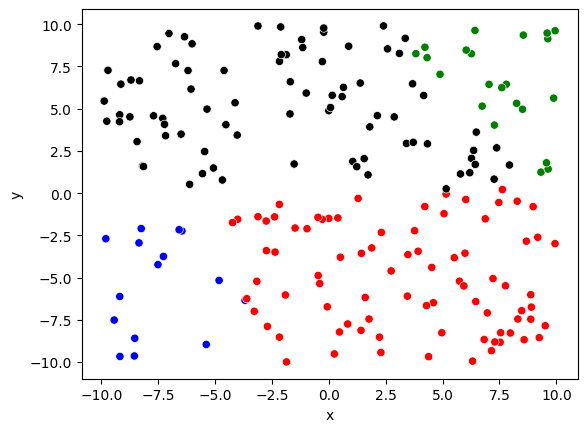

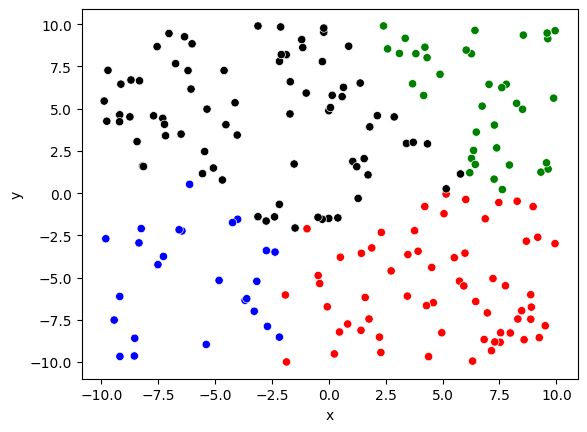

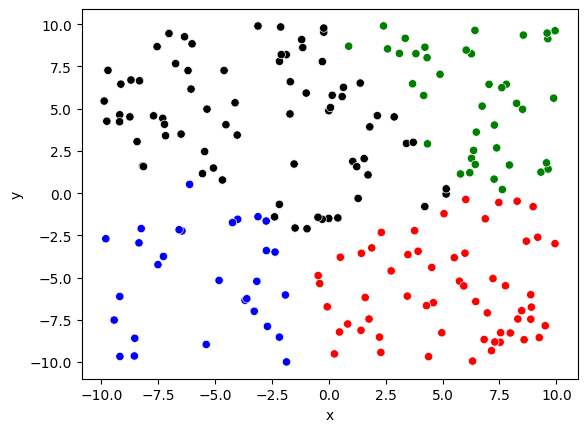

In [43]:
for i, labels in enumerate(kmeans.labels_history):
    plt.figure(i)
    df["val"] = pd.Series(labels).apply(lambda x: colors.get(x, "black"))
    sns.scatterplot(x=df["x"], y=df["y"], c=df["val"]).plot()